In [2]:
# Import dependencies:
from pathlib import Path
import pandas as pd
import numpy as np

# Part One:
In this part, we will analyze cryptocurrencies as an investment option and we would like to answer the following question:

## Are cryptocurrencies growing in popularity in comparison to the traditional stock market?

We will use historical data of market index SP 500 & gold index aganist our cryptocurrency portfolio that consists of the top 3 currencies, to compare Risk, Returns and Trading Volume.

Input Files we will use to demonstrate the comparison:
1. SP_500
2. GLD_DATA
3. ETH_DATA
4. BTC_DATA
5. XRP_DATA


In [3]:
# Determine csv path for Crypto-folio:
eth_file = Path ('Data/ETH-USD.csv')
btc_file = Path('Data/BTC-USD.csv')
xrp_file = Path('Data/XRP-USD.csv')

# Determine csv path for market indices:
sp500_file = Path('Data/S&P-500.csv')
gld_file = Path('Data/GLD_Data.csv')

# Pass the file to pandas and define the index:
eth_df = pd.read_csv(eth_file, index_col = 'Date', parse_dates=True)
btc_df = pd.read_csv(btc_file, index_col = 'Date', parse_dates=True)
xrp_df = pd.read_csv(xrp_file, index_col = 'Date', parse_dates=True)

# Pass market indices to pandas and define index:
sp500_df = pd.read_csv(sp500_file, index_col = 'Date', parse_dates=True)
gld_df = pd.read_csv(gld_file, index_col = 'Date', parse_dates=True)

In [4]:
# testing the dataframe:
xrp_df.head()
eth_df.head()
btc_df.head()
sp500_df.head()
gld_df.head()

,GLD Close,GLD Volume
Date,,
2015-08-03,104.10,3528596
2015-08-04,104.31,3241016
2015-08-05,103.93,5041015
2015-08-06,104.39,3908124
2015-08-07,104.65,4400915


In [5]:
# Dropping unnecessary columns in crypto-folio:
eth_df.drop(columns=['Open', 'High', 'Low', 'Adj Close'], inplace=True)
btc_df.drop(columns=['Open', 'High', 'Low', 'Adj Close'], inplace=True)
xrp_df.drop(columns=['Open', 'High', 'Low', 'Adj Close'], inplace=True)

# Market index:
sp500_df.drop(columns=['Open', 'High', 'Low', 'Adj Close'], inplace=True)

sp500_df.head()

,Close,Volume
Date,,
2015-08-03,2098.040039,3476770000
2015-08-04,2093.320068,3546710000
2015-08-05,2099.840088,3968680000
2015-08-06,2083.560059,4246570000
2015-08-07,2077.570068,3602320000


In [6]:
# Rename columns to reflect each crypto-ticker:
eth_df = eth_df.rename(columns= {'Close':'ETH Close', 'Volume':'ETH Volume'})
btc_df = btc_df.rename(columns= {'Close':'BTC Close', 'Volume':'BTC Volume'})
xrp_df = xrp_df.rename(columns= {'Close':'XRP Close', 'Volume':'XRP Volume'})
sp500_df = sp500_df.rename(columns= {'Close':'S&P500 Close', 'Volume':'S&P500 Volume'})
sp500_df.head()

,S&P500 Close,S&P500 Volume
Date,,
2015-08-03,2098.040039,3476770000
2015-08-04,2093.320068,3546710000
2015-08-05,2099.840088,3968680000
2015-08-06,2083.560059,4246570000
2015-08-07,2077.570068,3602320000


---

In [154]:
# Calculate Daily returns for each ticker:

In [7]:
# ETH RETURNS:
eth_returns=eth_df['ETH Close'].pct_change()
eth_returns.head() # notice name is ETH Close still, need to change but it's a series!

# convert series to dataframe:
eth_returns = eth_returns.to_frame()

# reanme colum & drop null:
eth_returns = eth_returns.rename(columns={'ETH Close':'ETH'})
eth_returns.dropna(inplace=True)
eth_returns.head()

,ETH
Date,
2015-08-08,-0.728249
2015-08-09,-0.068268
2015-08-10,0.009333
2015-08-11,0.507323
2015-08-12,0.140075


In [8]:
# BTC RETURNS:
btc_returns=btc_df['BTC Close'].pct_change()
btc_returns = btc_returns.to_frame()
btc_returns = btc_returns.rename(columns={'BTC Close':'BTC'})
btc_returns.dropna(inplace=True)
btc_returns.head()

,BTC
Date,
2015-08-02,0.003597
2015-08-03,-0.004908
2015-08-04,0.014191
2015-08-05,-0.011696
2015-08-06,-0.011725


In [9]:
# XRP RETURNS:
xrp_returns=xrp_df['XRP Close'].pct_change()
xrp_returns = xrp_returns.to_frame()
xrp_returns = xrp_returns.rename(columns={'XRP Close':'XRP'})
xrp_returns.dropna(inplace=True)
xrp_returns.head()

,XRP
Date,
2015-08-02,0.000973
2015-08-03,0.006197
2015-08-04,-0.001208
2015-08-05,-0.005683
2015-08-06,-0.024319


In [10]:
# SP500 RETURNS:
sp500_returns = sp500_df['S&P500 Close'].pct_change()
sp500_returns = sp500_returns.to_frame()
sp500_returns = sp500_returns.rename(columns={'S&P500 Close':'S&P500'})
sp500_returns.dropna(inplace=True)
sp500_returns.head()

,S&P500
Date,
2015-08-04,-0.002250
2015-08-05,0.003115
2015-08-06,-0.007753
2015-08-07,-0.002875
2015-08-10,0.012808


In [11]:
# GLD RETURNS:
gld_returns = gld_df['GLD Close'].pct_change()
gld_returns = gld_returns.to_frame()
gld_returns = gld_returns.rename(columns={'GLD Close':'GLD'})
gld_returns.dropna(inplace=True)
gld_returns.head()

,GLD
Date,
2015-08-04,0.002017
2015-08-05,-0.003643
2015-08-06,0.004426
2015-08-07,0.002491
2015-08-10,0.010225


In [12]:
# Concat all dataframes to extract volume data only:
crypto= pd.concat([btc_df, eth_df, xrp_df, sp500_df, gld_df], axis='columns', join='inner')
crypto.head()

,BTC Close,BTC Volume,ETH Close,ETH Volume,XRP Close,XRP Volume,S&P500 Close,S&P500 Volume,GLD Close,GLD Volume
Date,,,,,,,,,,
2015-08-07,279.584991,42484800,2.772120,164329,0.008152,363643,2077.570068,3602320000,104.65,4400915
2015-08-10,264.470001,20979400,0.708448,405283,0.008750,472973,2104.179932,3514460000,105.72,5892602
2015-08-11,270.385986,25433900,1.067860,1463100,0.008591,282461,2084.070068,3708880000,106.26,4060892
2015-08-12,266.376007,26815400,1.217440,2150620,0.008271,287463,2086.050049,4269130000,107.75,10022547
2015-08-13,264.079987,27685500,1.827670,4068680,0.008147,202934,2083.389893,3221300000,106.86,4761682


In [13]:
# dataframe that has only volume for each ticker:
crypto_vol = crypto.drop(columns=['BTC Close', 'ETH Close', 'XRP Close', 'S&P500 Close','GLD Close'])
crypto_vol.head()

,BTC Volume,ETH Volume,XRP Volume,S&P500 Volume,GLD Volume
Date,,,,,
2015-08-07,42484800,164329,363643,3602320000,4400915
2015-08-10,20979400,405283,472973,3514460000,5892602
2015-08-11,25433900,1463100,282461,3708880000,4060892
2015-08-12,26815400,2150620,287463,4269130000,10022547
2015-08-13,27685500,4068680,202934,3221300000,4761682


In [14]:
# plot volume bar chart 5y ago, 5y after
volume_first_row = crypto_vol.iloc[0]
volume_last_row = crypto_vol.iloc[-1]

In [15]:
# plot next 5 years monte carlo prediction

# concat of returns
crypto_close = crypto.drop(columns=['BTC Volume', 'ETH Volume', 'XRP Volume', 'S&P500 Volume','GLD Volume'])
crypto_return = crypto_close.pct_change()
crypto_return.dropna(inplace=True)
crypto_return.head()
crypto_close.tail()

,BTC Close,ETH Close,XRP Close,S&P500 Close,GLD Close
Date,,,,,
2020-07-27,10990.87305,321.514099,0.223672,3239.409912,182.23
2020-07-28,10912.82324,316.657257,0.230277,3218.439941,183.75
2020-07-29,11100.46777,318.190887,0.243099,3258.439941,185.13
2020-07-30,11111.21387,334.586639,0.244522,3246.219971,183.76
2020-07-31,11323.46680,345.554657,0.258904,3271.120117,185.43


In [16]:
crypto_return.mean()

BTC Close       0.004061
ETH Close       0.007400
XRP Close       0.005769
S&P500 Close    0.000437
GLD Close       0.000492
dtype: float64

In [17]:
crypto_return.std()

BTC Close       0.046816
ETH Close       0.083135
XRP Close       0.083905
S&P500 Close    0.012239
GLD Close       0.008474
dtype: float64

In [25]:
avg_btc, vol_btc = crypto_return.mean()['BTC Close'], crypto_return.std()['BTC Close']
avg_eth, vol_eth = crypto_return.mean()['ETH Close'], crypto_return.std()['ETH Close']
avg_xrp, vol_xrp = crypto_return.mean()['XRP Close'], crypto_return.std()['XRP Close']
avg_sp, vol_sp = crypto_return.mean()['S&P500 Close'], crypto_return.std()['S&P500 Close']
avg_gld, vol_gld = crypto_return.mean()['GLD Close'], crypto_return.std()['GLD Close']

In [26]:
last_px = crypto_close.iloc[-1]
last_px

BTC Close       11323.466800
ETH Close         345.554657
XRP Close           0.258904
S&P500 Close     3271.120117
GLD Close         185.430000
Name: 2020-07-31 00:00:00, dtype: float64

In [32]:
number_simulations = 100
number_records = 252 * 5
monte_carlo = pd.DataFrame()

crypto_sim_price_df = pd.DataFrame()
crypto_port_cum_returns = pd.DataFrame()

sg_sim_price_df = pd.DataFrame()
sg_port_cum_returns = pd.DataFrame()

for n in range(number_simulations):
    
    sim_btc_pxs = [last_px['BTC Close']]
    sim_eth_pxs = [last_px['ETH Close']]
    sim_xrp_pxs = [last_px['XRP Close']]
    sim_sp500_pxs = [last_px['S&P500 Close']]
    sim_gld_pxs = [last_px['GLD Close']]
    
    for i in range(number_records):
        
        # sim each price
        sim_btc = sim_btc_pxs[-1] * (1 + np.random.normal(avg_btc, vol_btc))
        sim_eth = sim_eth_pxs[-1] * (1 + np.random.normal(avg_eth, vol_eth))
        sim_xrp = sim_xrp_pxs[-1] * (1 + np.random.normal(avg_xrp, vol_xrp))
        sim_sp500 = sim_sp500_pxs[-1] * (1 + np.random.normal(avg_sp, vol_sp))
        sim_gld = sim_gld_pxs[-1] * (1 + np.random.normal(avg_gld, vol_gld))
        
        
        # Append the simulated price to the list
        sim_btc_pxs.append(sim_btc)
        sim_eth_pxs.append(sim_eth)
        sim_xrp_pxs.append(sim_xrp)
        sim_sp500_pxs.append(sim_sp500)
        sim_gld_pxs.append(sim_gld)
        
    crypto_sim_price_df["BTC"] = pd.Series(sim_btc_pxs)
    crypto_sim_price_df["ETH"] = pd.Series(sim_eth_pxs)
    crypto_sim_price_df["XRP"] = pd.Series(sim_xrp_pxs)
    
    sg_sim_price_df["SPX"] = pd.Series(sim_sp500_pxs)
    sg_sim_price_df["GLD"] = pd.Series(sim_gld_pxs)
    
    # Calculate the daily returns of simulated prices
    crypto_sim_daily_returns = crypto_sim_price_df.pct_change()
    crypto_weights = [0.33, 0.33, 0.34]
    
    sg_sim_daily_returns = sg_sim_price_df.pct_change()
    sg_weights = [0.8, 0.2]
    
    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
    crypto_port_daily_returns = crypto_sim_daily_returns.dot(crypto_weights)
    sg_port_daily_returns = sg_sim_daily_returns.dot(sg_weights)
    
    # Calculate the normalized, cumulative return series
    crypto_port_cum_returns[n] = (1 + crypto_port_daily_returns.fillna(0)).cumprod()
    sg_port_cum_returns[n] = (1 + sg_port_daily_returns.fillna(0)).cumprod()
    
crypto_port_cum_returns.tail()    
sg_port_cum_returns.tail()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
1256,1.195620,1.993860,3.111670,2.181371,2.850923,2.017956,0.873561,1.307001,1.884570,1.395578,...,1.901983,2.218780,1.301032,2.090472,2.597134,2.918245,1.969221,1.189510,2.290962,2.467277
1257,1.191201,2.014467,3.147494,2.158325,2.837324,2.024328,0.861694,1.316481,1.850656,1.381651,...,1.883430,2.160183,1.294146,2.101245,2.567385,2.953524,1.994932,1.189535,2.277016,2.479447
1258,1.190700,2.047682,3.121202,2.187464,2.865869,2.033465,0.873402,1.328511,1.833812,1.393252,...,1.899756,2.185290,1.295204,2.116948,2.550950,2.985601,1.994334,1.200557,2.248404,2.469174
1259,1.194854,2.036671,3.132457,2.204426,2.883114,2.002250,0.881438,1.347331,1.844764,1.385019,...,1.936638,2.202471,1.292685,2.135076,2.572147,2.923197,1.995895,1.196920,2.235668,2.463383
1260,1.184366,2.053090,3.165201,2.176151,2.889415,2.005783,0.885463,1.361048,1.851061,1.395345,...,1.968998,2.168802,1.296595,2.162207,2.579423,2.889934,2.039510,1.190156,2.268248,2.498122


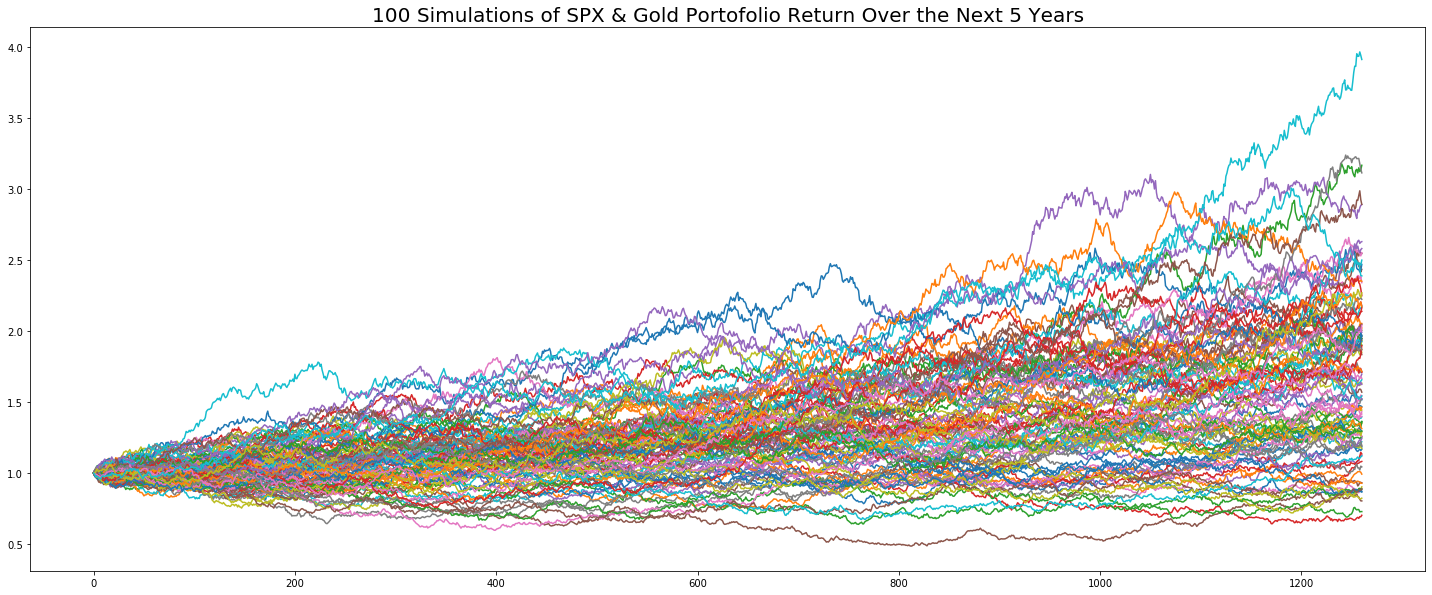

In [33]:
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
%matplotlib inline

sg_port_plot_title = f"{n+1} Simulations of SPX & Gold Portofolio Return Over the Next 5 Years"
sg_port_plot = sg_port_cum_returns.plot(legend=None, title=sg_port_plot_title, figsize=(25,10))
sg_port_plot.title.set_size(20);

plt.savefig('sg_port_plot.png')

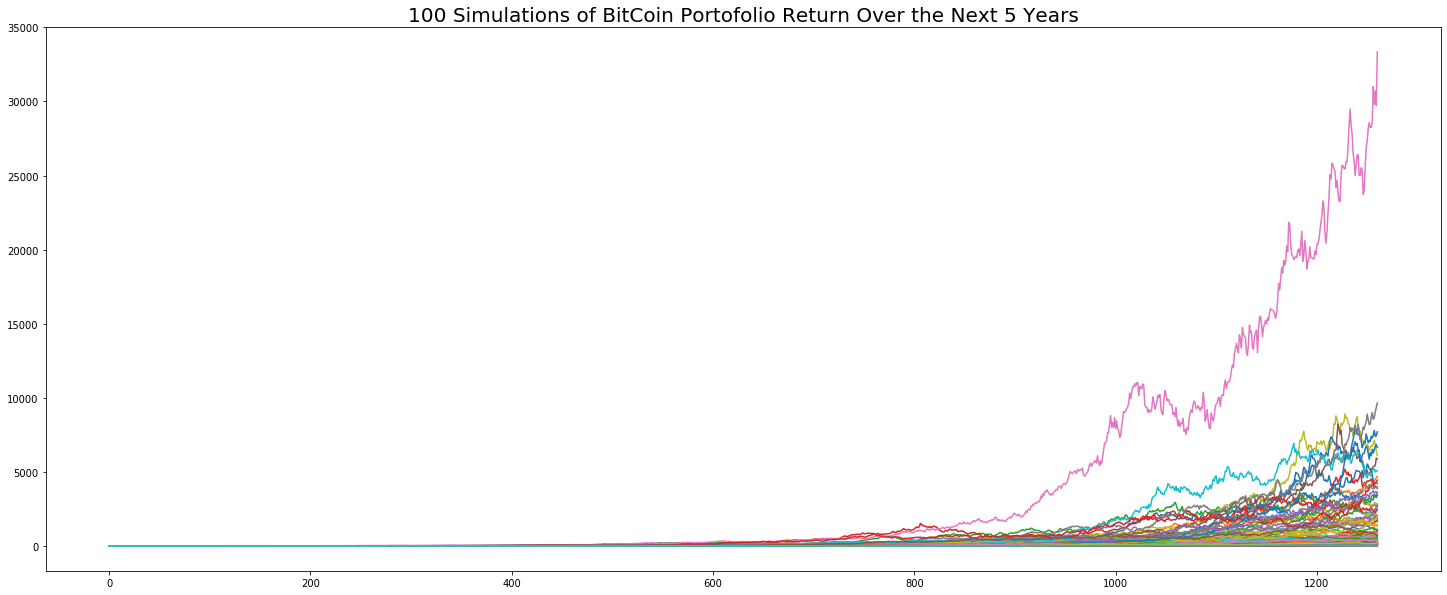

In [34]:
crypto_port_plot_title = f"{n+1} Simulations of BitCoin Portofolio Return Over the Next 5 Years"
crypto_port_plot = crypto_port_cum_returns.plot(legend=None, title=crypto_port_plot_title, figsize=(25,10))
crypto_port_plot.title.set_size(20);

plt.savefig('crypto_port_plot.png')

---

# OUTPUTS

## Daily returns for Market Index & Crypto-folio

In [162]:
crypto_folio= pd.concat([btc_returns, eth_returns, xrp_returns, sp500_returns, gld_returns], axis='columns', join='inner')
crypto_folio.head()

,BTC,ETH,XRP,S&P500,GLD
Date,,,,,
2015-08-10,-0.002313,0.009333,-0.006585,0.012808,0.010225
2015-08-11,0.022369,0.507323,-0.018171,-0.009557,0.005108
2015-08-12,-0.014831,0.140075,-0.037248,0.000950,0.014022
2015-08-13,-0.008619,0.501240,-0.014992,-0.001275,-0.008260
2015-08-14,0.006059,0.000109,0.023321,0.003912,-0.000094


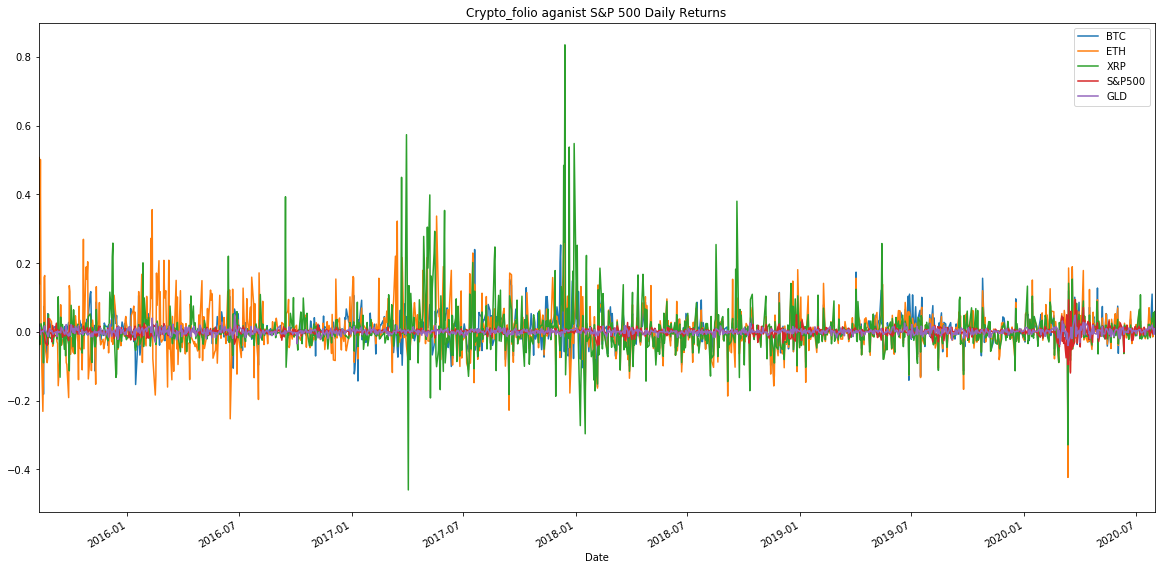

In [163]:
# Visualizing Daily returns for each:
%matplotlib inline
crypto_folio.plot(title="Crypto_folio aganist S&P 500 Daily Returns", figsize=(20,10))

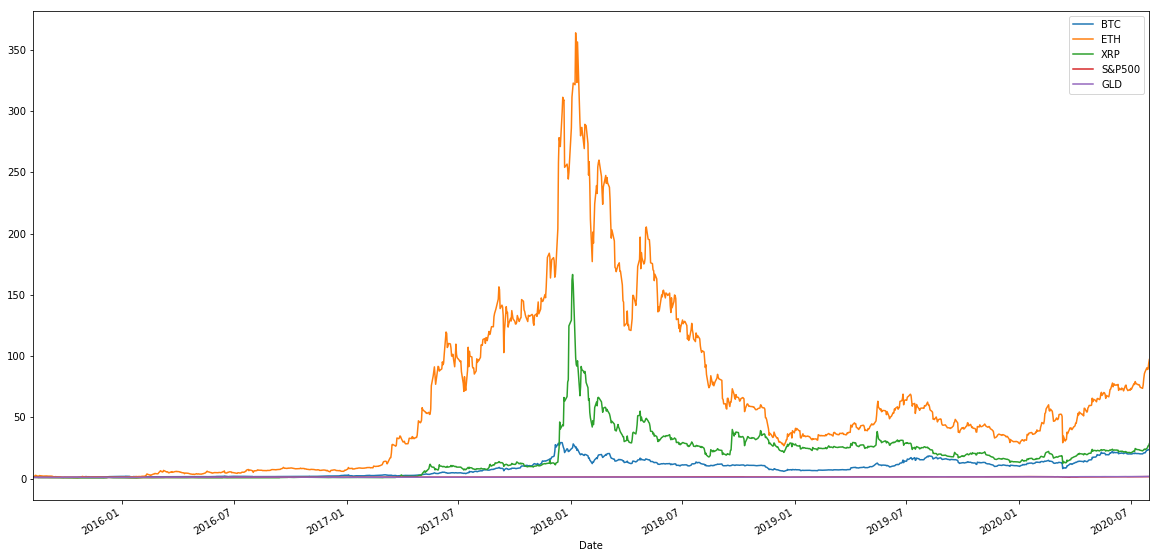

In [164]:
cum_returns = (1 + crypto_folio).cumprod()
cum_returns.plot(figsize=(20,10))

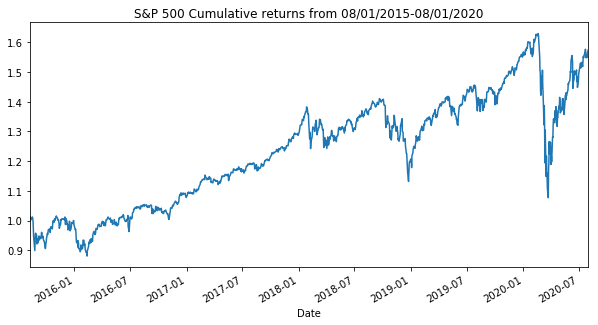

In [165]:
cum_returns['S&P500'].plot(figsize=(10,5), title='S&P 500 Cumulative returns from 08/01/2015-08/01/2020')

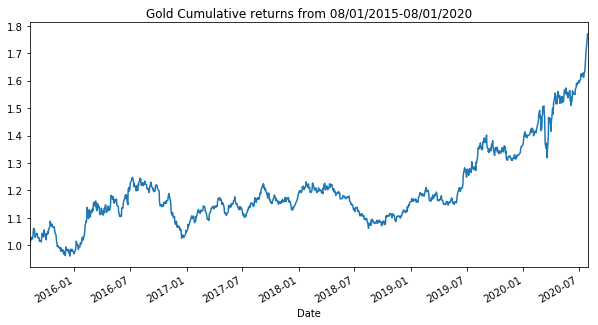

In [166]:
cum_returns['GLD'].plot(figsize=(10,5), title='Gold Cumulative returns from 08/01/2015-08/01/2020')

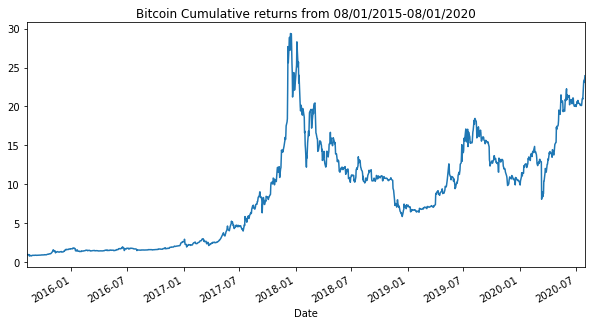

In [167]:
cum_returns['BTC'].plot(figsize=(10,5), title='Bitcoin Cumulative returns from 08/01/2015-08/01/2020')

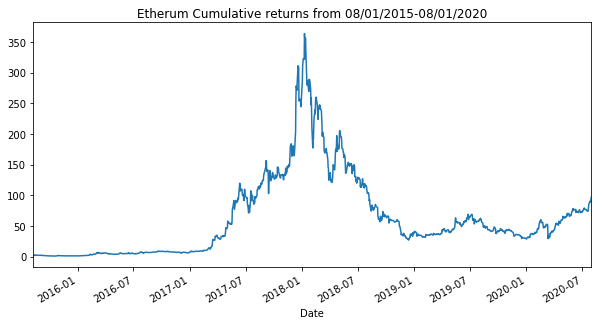

In [168]:
cum_returns['ETH'].plot(figsize=(10,5), title='Etherum Cumulative returns from 08/01/2015-08/01/2020')

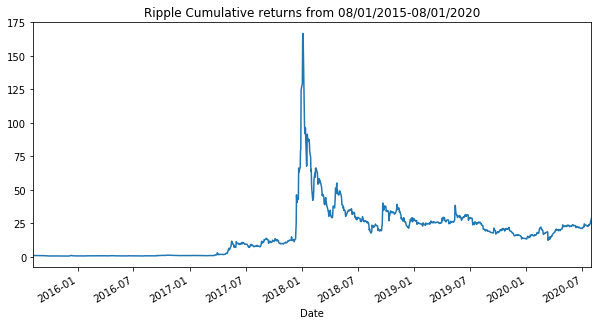

In [169]:
cum_returns['XRP'].plot(figsize=(10,5), title='Ripple Cumulative returns from 08/01/2015-08/01/2020')

In [193]:
# let's look at the numbers & see my investment returns if we started with $ 5000 in each:
btc = cum_returns['BTC'].iloc[-1] *5000
eth = cum_returns['ETH'].iloc[-1] *5000
xrp = cum_returns['XRP'].iloc[-1] *5000
sp_500 = cum_returns['S&P500'].iloc[-1] *5000
gld = cum_returns['GLD'].iloc[-1] *5000

print(f'If $ 5000 was invested in Bitcoin, I would end up after 5 years with'  f' $ {round(btc,2)}')
print(f'If $ 5000 was invested in Etherum, I would end up after 5 years with' f' $ {round(eth,2)}')
print(f'If $ 5000 was invested in Ripple, I would end up after 5 years with' f'  $ {round(xrp,2)}')
print(f'If $ 5000 was invested in Gold, I would end up after 5 years with' f'  $ {round(gld,2)}')
print(f'If $ 5000 was invested in S&P 500, I would end up after 5 years with' f'  $ {round(sp_500,2)}')

If $ 5000 was invested in Bitcoin, I would end up after 5 years with $ 119720.1
If $ 5000 was invested in Etherum, I would end up after 5 years with $ 485795.76
If $ 5000 was invested in Ripple, I would end up after 5 years with  $ 142216.29
If $ 5000 was invested in Gold, I would end up after 5 years with  $ 8859.53
If $ 5000 was invested in S&P 500, I would end up after 5 years with  $ 7872.47


In [194]:
daily_std = crypto_folio.std().sort_values(ascending=True)
daily_std

GLD       0.008474
S&P500    0.012239
BTC       0.042398
ETH       0.068130
XRP       0.074356
dtype: float64

In [37]:
import numpy as np
Annualized_std = daily_std * np.sqrt(252*5)
Annualized_std

S&P500    0.434442
BTC       1.504968
ETH       2.418386
XRP       2.639372
dtype: float64

In [38]:
# show the relationship accross the chosen platform:
correlation = crypto_folio.corr()
correlation

,BTC,ETH,XRP,S&P500
BTC,1.000000,0.473789,0.355066,0.147120
ETH,0.473789,1.000000,0.332140,0.138930
XRP,0.355066,0.332140,1.000000,0.111459
S&P500,0.147120,0.138930,0.111459,1.000000


In [39]:
sharpe_ratio = (crypto_folio.mean() * 252) / (crypto_folio.std() * np.sqrt(252))
sharpe_ratio

BTC       1.290668
ETH       1.375713
XRP       1.104044
S&P500    0.567319
dtype: float64

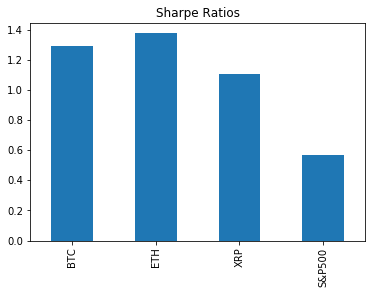

In [40]:
sharpe_ratio.plot(kind="bar", title="Sharpe Ratios")

In [41]:
sharpe_ratio = (crypto_folio.mean() * 252*5) / (crypto_folio.std() * np.sqrt(252*5))
sharpe_ratio

BTC       2.886021
ETH       3.076189
XRP       2.468717
S&P500    1.268563
dtype: float64

289%
308%
247%
127%


129%
138%
110%
57%


In [42]:
# compare trading volume use loop to iterate each row 

In [43]:
crypto_vol.head()

,BTC Volume,ETH Volume,XRP Volume,S&P500 Volume
Date,,,,
2015-08-07,42484800,164329,363643,3602320000
2015-08-10,20979400,405283,472973,3514460000
2015-08-11,25433900,1463100,282461,3708880000
2015-08-12,26815400,2150620,287463,4269130000
2015-08-13,27685500,4068680,202934,3221300000


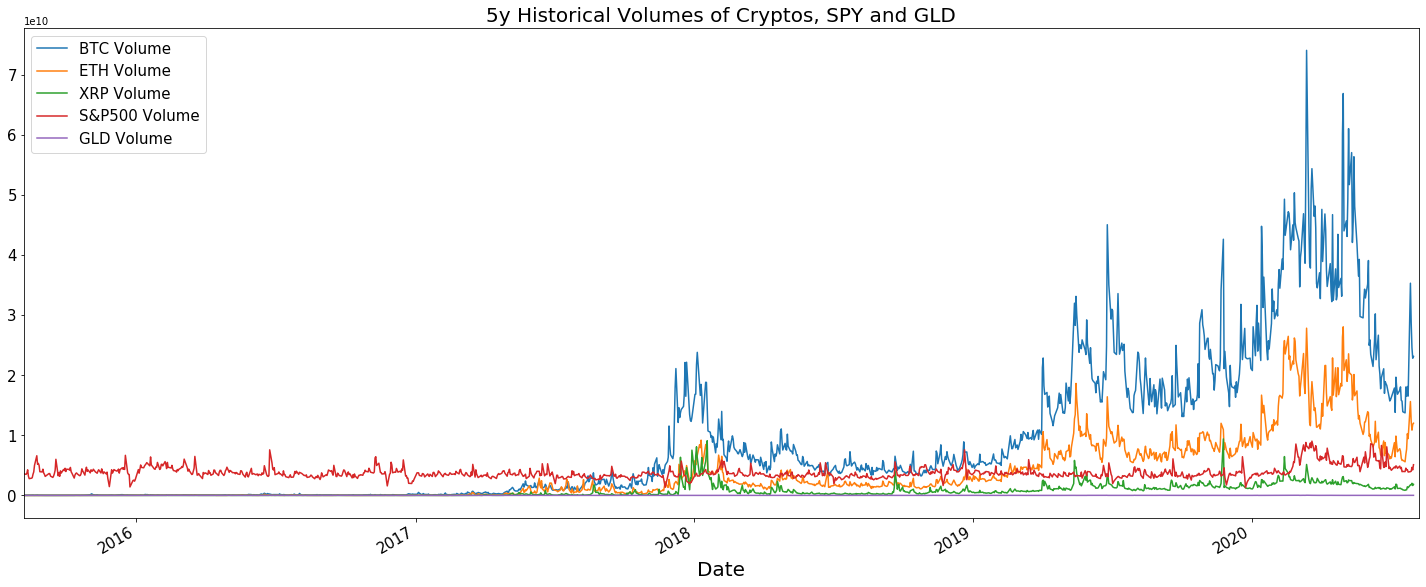

In [17]:
# plot trading volume across time

from datetime import datetime
import datetime as dt

hist_volume_plot = crypto_vol.plot(figsize=(25,10), title="5y Historical Volumes of Cryptos, SPY and GLD", 
                                        fontsize=15, xlim=(dt.date(2015,8,7),dt.date(2020,8,7)))
hist_volume_plot.xaxis.label.set_size(20);
hist_volume_plot.title.set_size(20);
hist_volume_plot.legend(loc=2, fontsize=15);

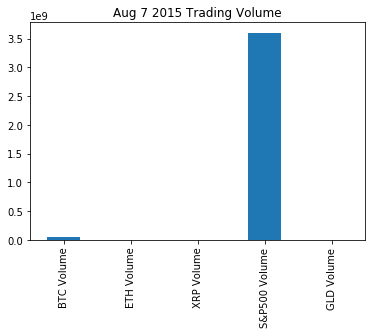

In [18]:
# trading volume bar chart comparison 5y ago
volume_first_row.plot(kind='bar', title='Aug 7 2015 Trading Volume')

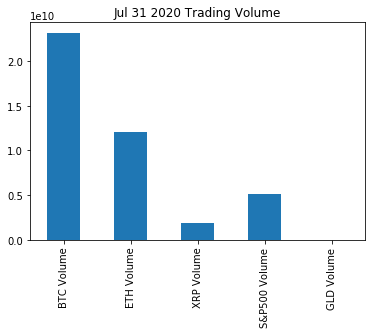

In [20]:
# trading volume bar chart comparison 5y after
volume_last_row.plot(kind='bar', title='Jul 31 2020 Trading Volume')